In [24]:
from shennong.utils import trading_days
from shennong.stk import stream,bar
import shennong.utils.symbol as cn_symbol

start = '2021-08-01'
end = '2021-09-30'


SYMBOL = cn_symbol.load(region='cn',product='ashare')

dates = trading_days.load(start_datetime = start, 
                        end_datetime  = end,
                        region='cn', product='ashare')
dates

['2021-08-02',
 '2021-08-03',
 '2021-08-04',
 '2021-08-05',
 '2021-08-06',
 '2021-08-09',
 '2021-08-10',
 '2021-08-11',
 '2021-08-12',
 '2021-08-13',
 '2021-08-16',
 '2021-08-17',
 '2021-08-18',
 '2021-08-19',
 '2021-08-20',
 '2021-08-23',
 '2021-08-24',
 '2021-08-25',
 '2021-08-26',
 '2021-08-27',
 '2021-08-30',
 '2021-08-31',
 '2021-09-01',
 '2021-09-02',
 '2021-09-03',
 '2021-09-06',
 '2021-09-07',
 '2021-09-08',
 '2021-09-09',
 '2021-09-10',
 '2021-09-13',
 '2021-09-14',
 '2021-09-15',
 '2021-09-16',
 '2021-09-17',
 '2021-09-22',
 '2021-09-23',
 '2021-09-24',
 '2021-09-27',
 '2021-09-28',
 '2021-09-29',
 '2021-09-30']

In [8]:
date = dates[1]
dict_dfs = stream.load(start_datetime = date+ " 09:31:30",
                    end_datetime = date+ " 14:57:00",
                    key_group_name = 'freq_3s_MA',
                    symbol_list = SYMBOL,
                    region='cn', product='ashare', freq='tick',
                    load_root = '/mnt/sda/NAS-203/ShareFolder2/zhizhou/', 
                    verbose=True)

Start loading data: /mnt/sda/NAS/AllData/config/general_trading_days.txt


In [9]:
dict_dfs

{}

In [10]:
import numpy as np
# train_data = np.load('./documents/train_set.npy')
train_data1 = np.load('./documents/bar/dataset2018-01-01_2018-12-31.npy')
train_data2 = np.load('./documents/bar/dataset2019-01-01_2019-07-01.npy')
train_data3 = np.load('./documents/bar/dataset2020-01-01_2020-12-31.npy')
train_data4 = np.load('./documents/bar/dataset2021-01-01_2021-07-31.npy')

In [36]:
train_data5 = np.load('./documents/bar/dataset2019-07-03_2019-12-31.npy')

In [37]:
train_data = np.vstack((train_data1,train_data2,train_data3,train_data4,train_data5)).astype(np.float32)

In [38]:
from sklearn.linear_model import LinearRegression
X_train = train_data[:,:69]
y_train = train_data[:,69]

linear_model = LinearRegression()
linear_model.fit(X=X_train,y=y_train)

LinearRegression()

In [39]:
cov_results_lm={}
for date in dates:
    test_data = np.load('./documents/bar/data_set_test'+date+'.npy')
    if np.size(test_data) == 0:
        print('Empty')
    else:
        X_test = test_data[:,:69]
        y_test = test_data[:,69]
        y_pred = linear_model.predict(X_test)
        X = np.stack((y_test, y_pred), axis=0)
        CovXY = np.corrcoef(X)[0][1]
        cov_results_lm[date]=CovXY

Empty


In [40]:
cov_results_lm

{'2021-08-02': 0.04324446197988224,
 '2021-08-03': -0.015174545780521232,
 '2021-08-04': -0.016924426036740114,
 '2021-08-06': 0.0012820139052918563,
 '2021-08-09': 0.024581832320231596,
 '2021-08-10': 0.01320137676966472,
 '2021-08-11': -0.024013633197698468,
 '2021-08-12': -0.021376464427570997,
 '2021-08-13': 0.02057344380766256,
 '2021-08-16': 0.011103686305214404,
 '2021-08-17': -0.00963121147178208,
 '2021-08-18': -0.031344743727134194,
 '2021-08-19': 0.01630544694436117,
 '2021-08-20': -0.006008907010912428,
 '2021-08-23': -0.009817566138923364,
 '2021-08-24': -0.00332584945650891,
 '2021-08-25': 0.005578242387923287,
 '2021-08-26': -0.01011241298077221,
 '2021-08-27': 0.0017996352728161494,
 '2021-08-30': 0.0018776068107828202,
 '2021-08-31': -0.004432170585566789,
 '2021-09-01': 0.010965114310407136,
 '2021-09-02': -0.016541209706122564,
 '2021-09-03': 0.04325332754510388,
 '2021-09-06': 0.016038103183410084,
 '2021-09-07': -0.00010757052887771273,
 '2021-09-08': -0.0125142941

/tmp/ipykernel_2720352/3854115810.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cov_results_lm.keys(), rotation = 60)


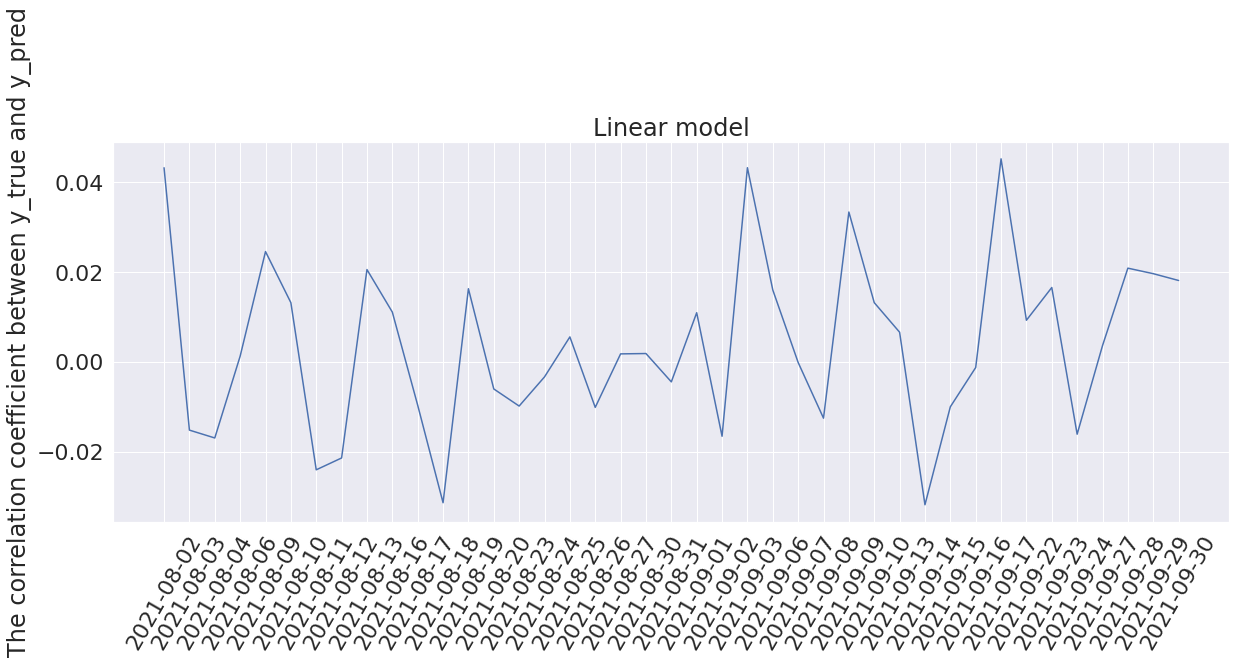

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
ax =plt.figure(figsize = (20,7))
ax = sns.lineplot(x=cov_results_lm.keys(),y=cov_results_lm.values())
ax.set_xticklabels(cov_results_lm.keys(), rotation = 60)
ax.set(ylabel='The correlation coefficient between y_true and y_pred')
ax.set_title('Linear model')
sns.set(font_scale=2)

In [42]:
lm_mean_ic = np.mean(np.fromiter(cov_results_lm.values(), dtype=float))
lm_ir = lm_mean_ic/np.std(np.fromiter(cov_results_lm.values(), dtype=float))
print('线性模型\nIC的均值为：{}\n IR为：{}'.format(lm_mean_ic,lm_ir))

线性模型
IC的均值为：0.0038053596667091552
 IR为：0.20061034986615953


In [43]:
from xgboost import XGBRegressor

xgb=XGBRegressor(booster='gbtree',max_depth=3,n_estimators=200,n_jobs=40)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200,
             n_jobs=40, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [44]:
cov_results_xgb={}
for date in dates:
    test_data = np.load('./documents/bar/data_set_test'+date+'.npy')
    if np.size(test_data) == 0:
        print('Empty')
    else:
        X_test = test_data[:,:69]
        y_test = test_data[:,69]
        y_pred = xgb.predict(X_test)
        X = np.stack((y_test, y_pred), axis=0)
        CovXY = np.corrcoef(X)[0][1]
        cov_results_xgb[date]=CovXY

Empty


/tmp/ipykernel_2720352/1883543400.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cov_results_xgb.keys(), rotation = 60)


Text(0.5, 1.0, 'XGBoost')

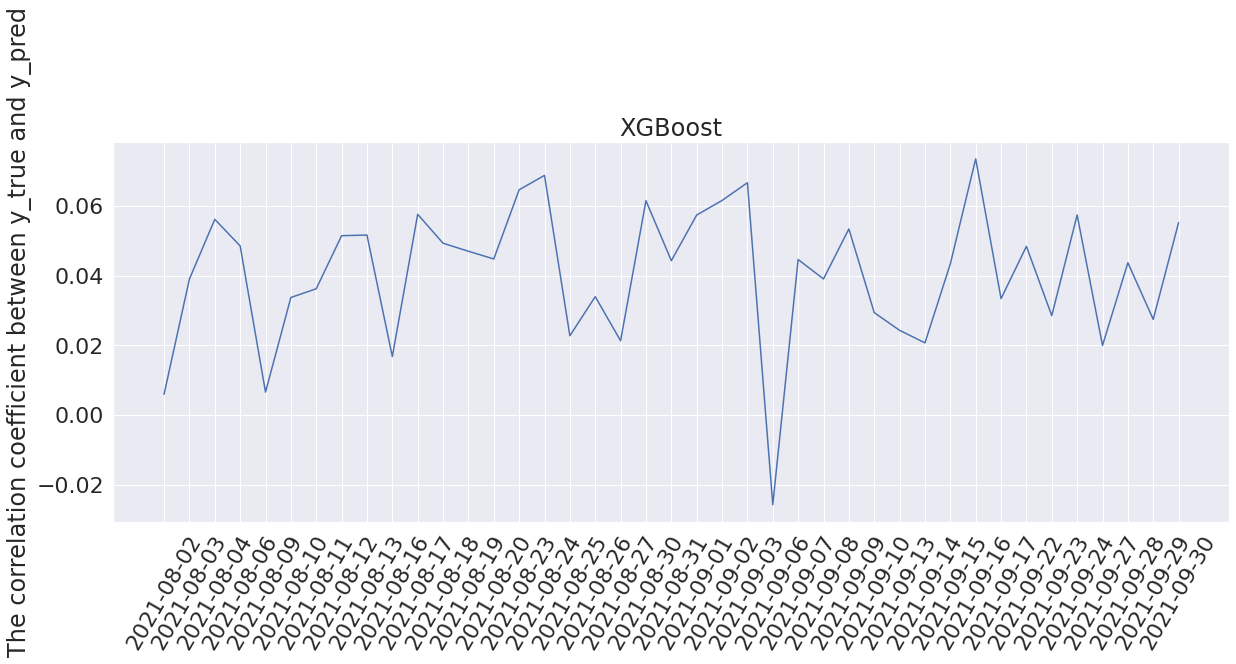

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
ax =plt.figure(figsize = (20,7))
sns.set(font_scale=2)
ax = sns.lineplot(x=cov_results_xgb.keys(),y=cov_results_xgb.values())
ax.set_xticklabels(cov_results_xgb.keys(), rotation = 60)
ax.set(ylabel='The correlation coefficient between y_true and y_pred')
ax.set_title('XGBoost')

In [46]:
xgb_mean_ic = np.mean(np.fromiter(cov_results_xgb.values(), dtype=float))
xgb_ir = xgb_mean_ic/np.std(np.fromiter(cov_results_xgb.values(), dtype=float))
print('XGBoost\nIC的均值为：{}\n IR为：{}'.format(xgb_mean_ic,xgb_ir))

XGBoost
IC的均值为：0.040556046575518825
 IR为：2.069165483057816
